## Logistic Regression Assumptions 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings(action='ignore')
import wget

## Downloading the data

In [2]:
url='https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
LogReg_file=wget.download(url)

100% [..........................................................................] 4882918 / 4882918

## Exporting the dataset

In [3]:
df=pd.read_csv("banking.csv")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
## Preprocessing the data
df=df.dropna()
print("The Shape of the Data : ",df.shape,"\n")
print("Columns : ",list(df.columns),"\n")
print("DataTypes : ",list(df.dtypes),"\n")
print("*Note* : o means Object here")

The Shape of the Data :  (41188, 21) 

Columns :  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'] 

DataTypes :  [dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64')] 

*Note* : o means Object here


In [5]:
jobs=df['job'].unique().tolist()
print(jobs,"\n")
unique_objects=df['job'].value_counts()
print(unique_objects)

['blue-collar', 'technician', 'management', 'services', 'retired', 'admin.', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed', 'unknown', 'student'] 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


**cat_cols** = list(df.select_dtypes(include=['object']).columns) - This line creates a list of the names of all columns in the dataframe df that have the data type 'object' (which usually means that they are categorical columns).

**cat_df** = [] - This line creates an empty list that will be used to store tuples, where each tuple will contain the name of a categorical column and a dataframe containing its unique values.

**for cat_col in cat_cols:** - This line starts a loop that will iterate through each categorical column in cat_cols.

**df_cate** = cat_col, df[cat_col].drop_duplicates() - This line creates a tuple called df_cate that contains the name of the current categorical column (cat_col) and a dataframe containing its unique values. The drop_duplicates() function is used to remove any duplicate values in the column.

**cat_df.append(df_cate)** - This line appends the df_cate tuple to the cat_df list.

**cat_df[0]** - This line returns the first tuple in cat_df, which contains the name of the first categorical column and a dataframe containing its unique values.

In [6]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_df=[]
for cat_col in cat_cols:
    df_cate=cat_col,df[cat_col].drop_duplicates()
    cat_df.append(df_cate)
cat_df[0]

('job',
 0        blue-collar
 1         technician
 2         management
 3           services
 4            retired
 8             admin.
 10         housemaid
 19        unemployed
 25      entrepreneur
 68     self-employed
 70           unknown
 103          student
 Name: job, dtype: object)

In [7]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [8]:
cat_df[2]

('education',
 0                  basic.4y
 1                   unknown
 2         university.degree
 3               high.school
 7                  basic.9y
 23      professional.course
 28                 basic.6y
 3059             illiterate
 Name: education, dtype: object)

## Grouping the column
__Basic.9y Basic.6y Basic.4y__ into a single column:Basic and storing in a __dataframe:Education__

In [9]:
for category in ['basic.9y','basic.6y','basic.4y']:
    df['education']=np.where(df['education']==category,'Basic',df['education'])

In [10]:
df['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
df['education'].drop_duplicates()

0                     Basic
1                   unknown
2         university.degree
3               high.school
23      professional.course
3059             illiterate
Name: education, dtype: object

In [12]:
df['y'].value_counts() ##DF Column Y

0    36548
1     4640
Name: y, dtype: int64

Text(0, 0.5, 'Count')

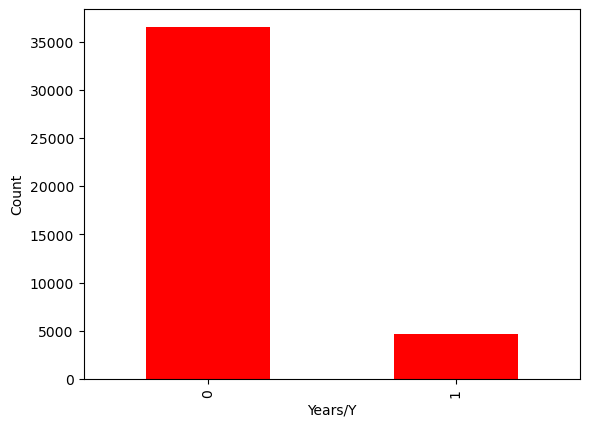

In [13]:
colors=df['y'].map({0:'red',1:'blue'})
df['y'].value_counts().plot(kind='bar',color=colors)
plt.xlabel("Years/Y")
plt.ylabel("Count")

## To Calculate the percentage of Subscriptions

In [14]:
counts=df['y'].value_counts()
pct_of_no_sub=counts[0]/counts.sum()*100
pct_of_sub=counts[1]/counts.sum()*100
print(f"Percentage of no subscription :{pct_of_no_sub:.2f}%")
print(f"Percentage of subscription :{pct_of_sub:.2f}%")

Percentage of no subscription :88.73%
Percentage of subscription :11.27%


Due to imbalance in our ratio 88:11
we need to rectify the above issue

In [15]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


* Customers who bought the term deposit were, on average, older than those who did not buy it.
* Customers who bought the term deposit were contacted more recently than those who did not buy it. This makes sense because recent contact may make them more likely to buy.
* Surprisingly, customers who bought the term deposit were contacted fewer times during the current campaign than those who did not buy it. This is unexpected because one would think that more contact would increase the chances of a sale.

In [16]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


_The df.groupby('COLUMN').mean() function groups the DataFrame df by the unique values in the 'education' column, and calculates the mean of each numeric column for each group. The result is a new DataFrame where the rows represent each unique value in the 'education' column, and the columns represent the mean of each numeric column for that education group._

In [17]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [18]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Visualizations

In [19]:
def visuals(df,title,xla):
    """Get the bar plots for the given columns."""
    pd.crosstab(df.job,df.y).plot(kind='bar')
    plt.title(title)
    plt.xlabel(xla)
    #plt.xticks(rotation=45)
    plt.ylabel("Frequency of Purchase")

""""def visuals_2(df,catcol,title,xla,yla):
    table = pd.crosstab(df[catcol],df.y)
    table.div(table.sum(1).astype(float),axis=0).plot(kind='barh',stacked=True)
    plt.title(title)
    plt.xlabel(xla)
    plt.ylabel(yla)"""

def visuals_2(df, catcol, title, xla, yla):
    table = pd.crosstab(df[catcol], df.y)
    ax = table.plot(kind='bar',title=title, xlabel=xla, ylabel=yla, rot=0, position=0.5, width=0.4)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=35)
    plt.legend(title='Purchase', loc='upper right')

The code first uses the **pd.crosstab()** function to create a frequency table of the catcol and y columns. The resulting table DataFrame shows the count of subscribers and non-subscribers for each category in catcol.

The **table.div(table.sum(1).astype(float),axis=0)** line divides each row of the table DataFrame by the sum of the row, which results in the proportion of subscribers and non-subscribers for each category.

Finally, the **.plot(kind='bar',stacked=True)** function generates a stacked bar plot, where each bar represents a category in catcol, and the height of each segment of the bar represents the proportion of subscribers and non-subscribers for that category. 

The **plt.title(), plt.xlabel(), and plt.ylabel()** functions add labels to the plot.

**If the bar chart shows that the proportion or count of the outcome variable y is roughly similar across all categories of marital status, then it may suggest that marital status is not a strong predictor of the outcome variable y. However, it is important to note that this is only one possible graph and that other types of graphs or statistical tests may be needed to confirm this conclusion**

## Job Title

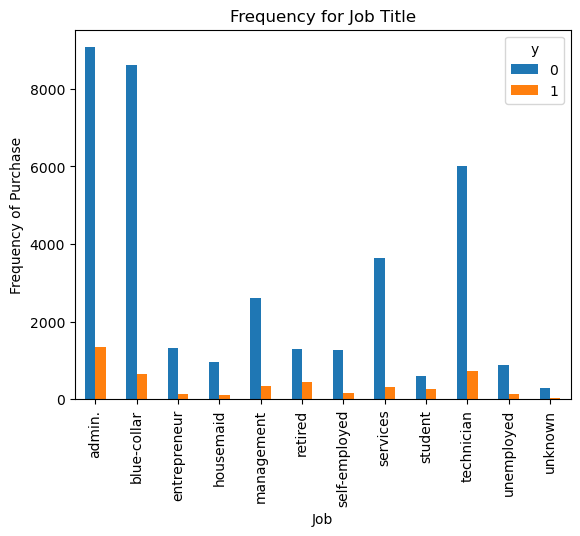

In [20]:
visuals(df,"Frequency for Job Title","Job")

#### Frequency of job seems a good and strong predictor based on the above note

# Marital Status

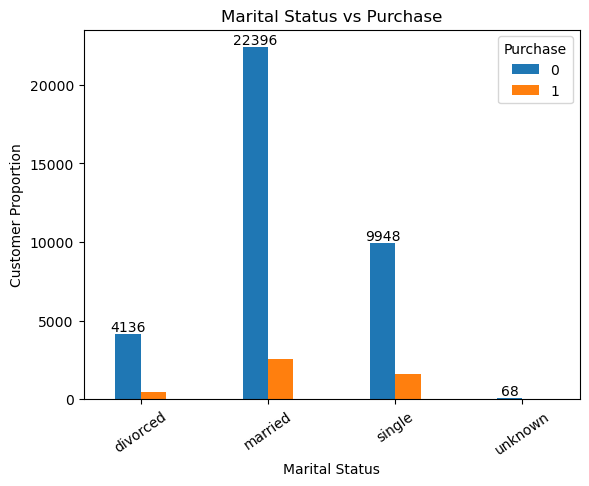

In [21]:
visuals_2(df,"marital","Marital Status vs Purchase","Marital Status","Customer Proportion")

#### Marital Status doesnt seem to be a good and strong predictor based on the above note

## Education

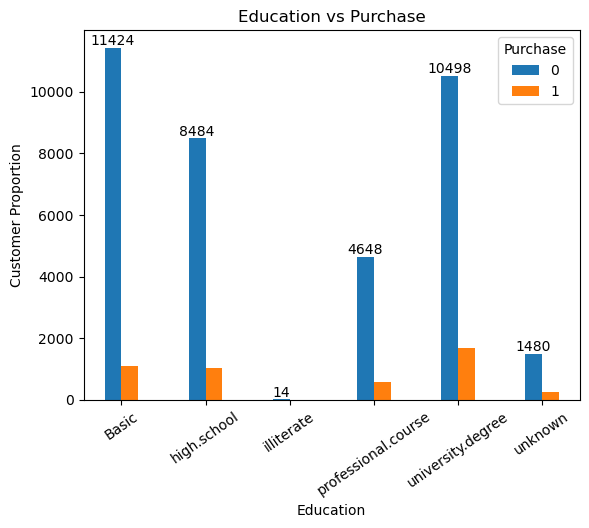

In [22]:
visuals_2(df,"education","Education vs Purchase","Education","Customer Proportion")

#### Education seems a good and strong predictor based on the above note

# Day of the Week

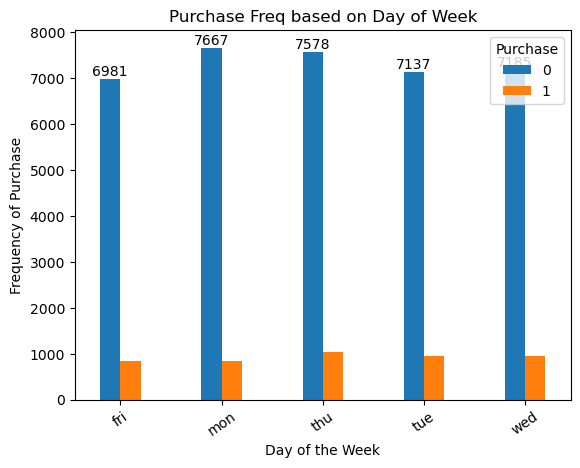

In [23]:
visuals_2(df,"day_of_week","Purchase Freq based on Day of Week","Day of the Week", "Frequency of Purchase")

####                 Day of the week doesnt seem to be a good Predictor

# Month

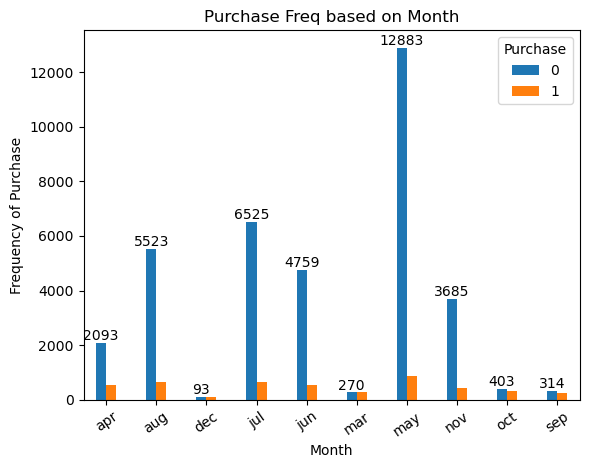

In [24]:
visuals_2(df,"month","Purchase Freq based on Month","Month", "Frequency of Purchase")

#### Month might be a good predictor

# Age

Text(0, 0.5, 'Frequency')

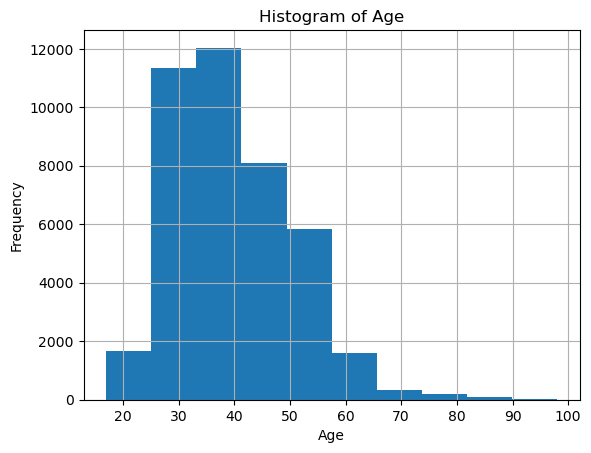

In [25]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#### Most of the customers are in the age of 30-40

## PoutCome

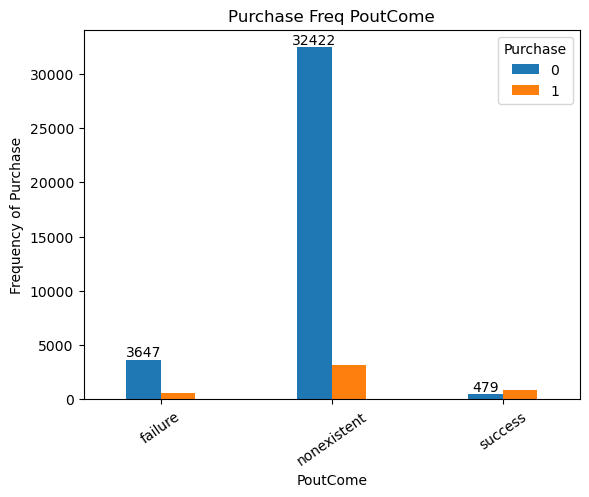

In [26]:
visuals_2(df,"poutcome","Purchase Freq PoutCome","PoutCome", "Frequency of Purchase")

#### Pouctome seems to be a good predictor

# Convert the categorical variables into dummy binaries
- We will use the following categorical Columns

In [27]:
data=df

In [28]:
# define categorical variables
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# create dummy variables for categorical variables
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data = pd.concat([data, cat_list], axis=1)

# drop the original categorical variables from the dataset
data.drop(cat_vars, axis=1, inplace=True)

# define the variables to keep in the dataset
to_keep = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 
           'euribor3m', 'nr_employed', 'y']
to_keep += [col for col in data.columns if col.startswith('job_')]
to_keep += [col for col in data.columns if col.startswith('marital_')]
to_keep += [col for col in data.columns if col.startswith('education_')]
to_keep += [col for col in data.columns if col.startswith('default_')]
to_keep += [col for col in data.columns if col.startswith('housing_')]
to_keep += [col for col in data.columns if col.startswith('loan_')]
to_keep += [col for col in data.columns if col.startswith('contact_')]
to_keep += [col for col in data.columns if col.startswith('month_')]
to_keep += [col for col in data.columns if col.startswith('day_of_week_')]
to_keep += [col for col in data.columns if col.startswith('poutcome_')]

# select the variables to keep in the dataset
data = data[to_keep]

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [30]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'], dtype=object)

## Over-sampling to overcome the sample imbalancebetween subscriptions and non-subscriptions
After constructing our training data,

- To address the issue of under-represented class in our data, we will use SMOTE (Synthetic Minority Oversampling Technique) algorithm to create more samples of the under-represented class.
- SMOTE generates new samples by creating artificial examples instead of duplicating the existing ones.
- It selects one of the k-nearest neighbors at random and uses it to create a new instance with some random modifications to make it comparable.
- We will implement SMOTE in Python to create more samples of the under-represented class.

1) There are not enough examples of people who subscribe to a service in our dataset.

2) We want to teach a computer program to predict who is likely to subscribe.

3) To make our program more accurate, we need more examples of people who subscribe.

4) We will use a technique called SMOTE to make more examples of people who subscribe.

5) SMOTE will look at the examples of people who subscribe and create new examples that are similar but not exactly the same.

6) Our program will use the new examples to learn how to predict who is likely to subscribe.

In [31]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

columns = X_train.columns
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

# We can check the numbers of our data
print("Length of oversampled data is ", len(os_data_X))
print("Number of no subscription in oversampled data: ", len(os_data_y[os_data_y['y'] == 0]))
print("Number of subscription: ", len(os_data_y[os_data_y['y'] == 1]))
print("Proportion of no subscription data in oversampled data is ", len(os_data_y[os_data_y['y'] == 0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ", len(os_data_y[os_data_y['y'] == 1])/len(os_data_X))


Length of oversampled data is  51134
Number of no subscription in oversampled data:  25567
Number of subscription:  25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


## The data after performing SMOTE for balancing

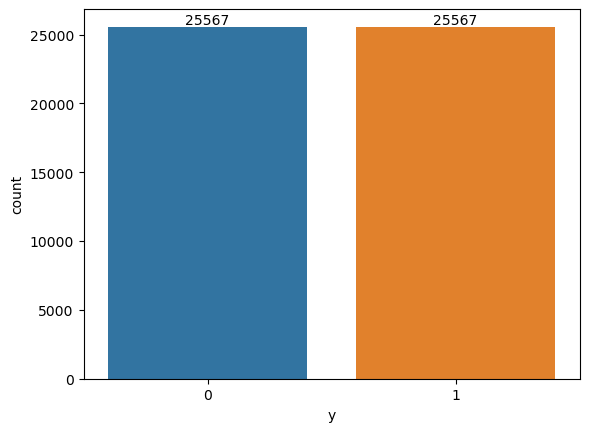

In [32]:
sns.countplot(data=os_data_y,x='y')
ax = plt.gca()
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.show()

1) We wanted to balance the dataset, so we applied a technique called oversampling to the training data.

2) Oversampling means creating more instances of the underrepresented class to make it as big as the other class.

3) We only applied oversampling to the training data and not the test data.

4) This was done to make sure that no information from the test data was used to create new instances of the underrepresented class.

5) By doing this, we ensure that the model is not influenced by any information in the test data during the training process.


 

## Linear regression implementation

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Predicting the test set results and the accuracy

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.92


Accuracy:  0.9170197509940682


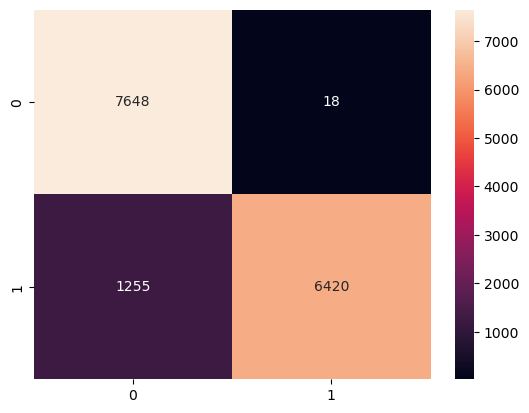

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='g')
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

- The result is telling us that we have 7648+6420 correct predictions
- 1255+18 incorrect predictions

- Compute the confusion matrix for the classification results using the actual values in y_test and the predicted values in y_pred.
- Compute the number of true positives (tp), false positives (fp), false negatives (fn), and true negatives (tn).
- Compute the precision as tp / (tp + fp).
- Compute the recall as tp / (tp + fn).
- Compute the F-beta score using the formula F-beta = (1 + beta^2) * (precision * recall) / (beta^2 * precision + recall), where beta is a weight factor that determines the relative importance of recall and precision.
- Finally, compute the support as the number of instances of each class in y_test.

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      7666
           1       1.00      0.84      0.91      7675

    accuracy                           0.92     15341
   macro avg       0.93      0.92      0.92     15341
weighted avg       0.93      0.92      0.92     15341



## Interpretation:
Out of the complete set of test data, 93% of the term deposits that were promoted correspondedto the deposits that were preferred by the customers

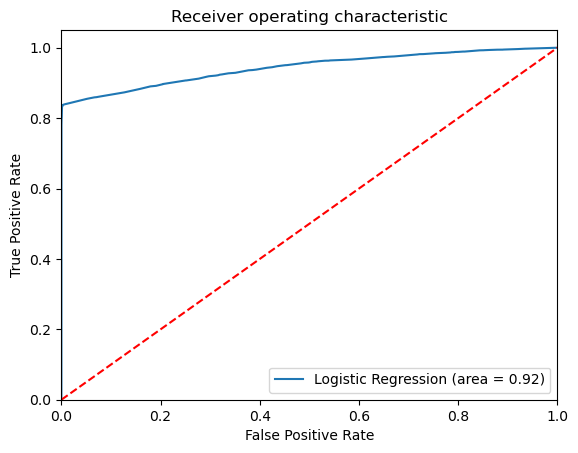

In [51]:
# generate and plot ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- The ROC curve is a useful tool for evaluating binary classifiers, with a reliable classifier aiming to stay as far as possible from the dotted line that represents the ROC curve of a random classifier.
- Prior to applying data to the LR model, several steps were taken, including data visualization to identify effective and ineffective predictors, and addressing the imbalance in the y variable using SMOTE.
- Recursive feature elimination was conducted to select the best features to improve model accuracy.
- Columns with insignificant P-values (>=0.5) were removed after implementing the LR method.

We want the computer to be really good at guessing correctly, so we give it lots of examples to learn from. We also need to make sure it doesn't guess randomly like flipping a coin. That's why we use a special graph called the ROC curve to see how good the computer is at guessing.

Before we use the computer to guess, we look at all the examples we have and pick out the most important things that help us make the best guess. We also get rid of things that don't help us guess. Then we ask the computer to guess, and we use the ROC curve to see how good it is at guessing.